# Part III. Tools for Causal Discovery – CaDis 2023

In [2]:
# We make sure that we have the necessary packages
install.packages("BiocManager")

BiocManager::install("Rgraphviz")
BiocManager::install("graph")
BiocManager::install("RBGL")

install.packages("fastICA",dependencies = TRUE)
install.packages("pcalg",dependencies = TRUE)


  There is a binary version available but the source version is later:
             binary  source needs_compilation
BiocManager 1.30.15 1.30.21             FALSE



installing the source package 'BiocManager'

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org
Bioconductor version 3.10 (BiocManager 1.30.21), R 3.6.1 (2019-07-05)
Warning message:
"package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'Rgraphviz'"Old packages: 'askpass', 'backports', 'bdsmatrix', 'BH', 'boot', 'broom',
  'callr', 'caret', 'class', 'cli', 'clipr', 'clue', 'cluster', 'codetools',
  'colorspace', 'crayon', 'curl', 'data.table', 'DBI', 'dbplyr', 'dichromat',
  'digest', 'dplyr', 'ellipsis', 'evaluate', 'fansi', 'forcats', 'foreach',
  'formatR', 'fs', 'generics', 'ggplot2', 'glmnet', 'glue', 'gower', 'gtable',
  'haven', 'hexbin', 'highr', 'hms', 'htmltools', 'htmlwidgets', 'httpuv',
  'httr', 'huge', 'igraph', 'ipred', 'IRdisplay', 'IRkernel', 'iterators',
  'jsonlite', 'Ke


  There is a binary version available but the source version is later:
      binary source needs_compilation
pcalg  2.7-2  2.7-8              TRUE

  Binaries will be installed
package 'pcalg' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\samue\AppData\Local\Temp\RtmpuE3Cbh\downloaded_packages


In [3]:
# then we load them
library(pcalg)
library(graph)
library(Rgraphviz)
library(RBGL)
set.seed(449)

Warning message:
"package 'pcalg' was built under R version 3.6.3"Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min

Loading required package: grid


### Exploring elementary objects

V1,V2,V3,V4,V5
0,0,1,0,1
1,0,0,0,0
1,1,1,0,1
0,0,0,0,0
0,1,0,0,1
1,1,0,0,1
1,1,1,0,1
0,0,0,0,0
1,0,1,0,1
1,0,0,0,0


A graphNEL graph with directed edges
Number of Nodes = 5 
Number of Edges = 5 

[1] "1" "2" "3" "4" "5"

$`1`
$`1`$edges
integer(0)


$`2`
$`2`$edges
[1] 1


$`3`
$`3`$edges
[1] 5


$`4`
$`4`$edges
[1] 2 3


$`5`
$`5`$edges
[1] 2

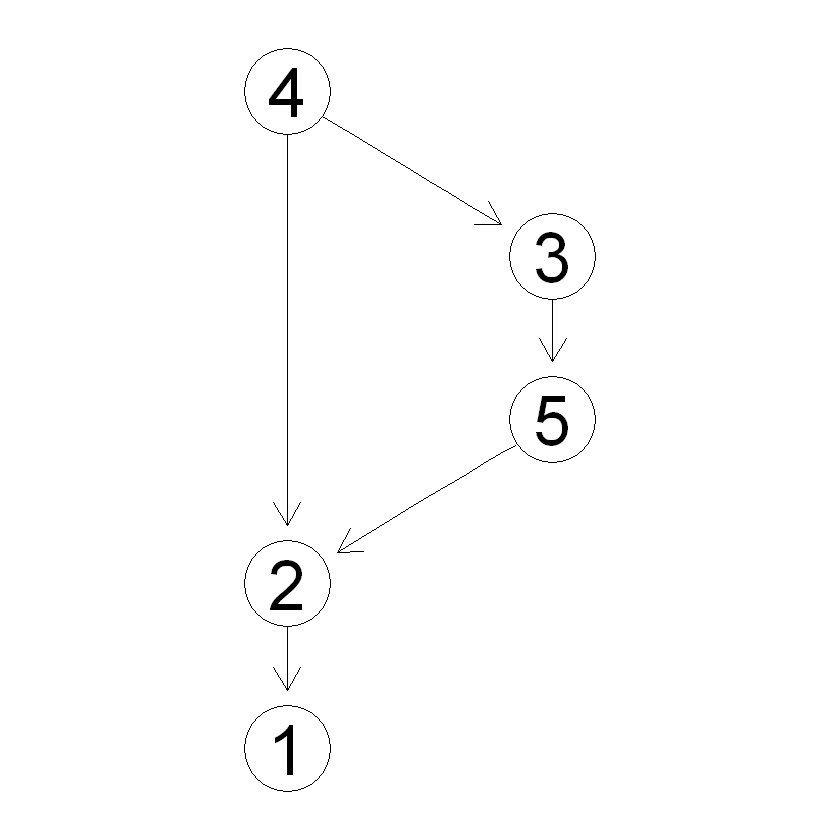

In [4]:
# Loading a data set with binary variables
data(gmB)

# The gmB was loaded in the workspace and contains two elements

# data (200 observations)
gmB$x[0:20,]

# model represeted by a DAG
gmB$g
# list of nodes and edges
gmB$g@nodes
gmB$g@edgeL

# plotting the DAG
plot(gmB$g)

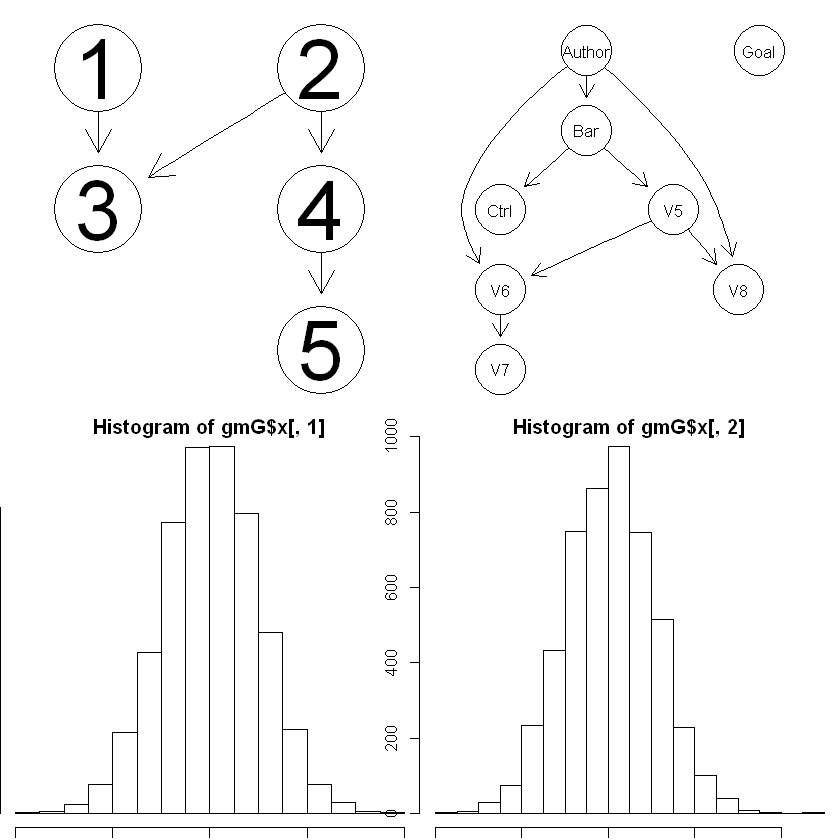

In [5]:
# more data sets
# [B]inary, [D]iscrete, [G]aussian
par(mfrow=c(2,2))
data(gmD)
plot(gmD$g)

data(gmG)
plot(gmG$g)

# visualizing gmG distribution of some variables
hist(gmG$x[,1])
hist(gmG$x[,2])

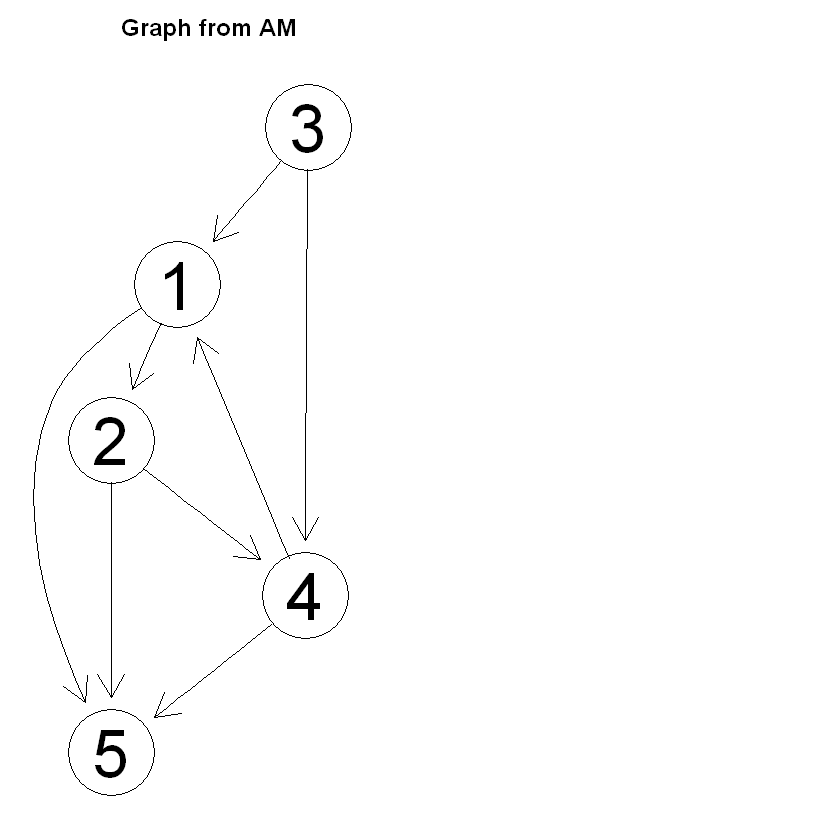

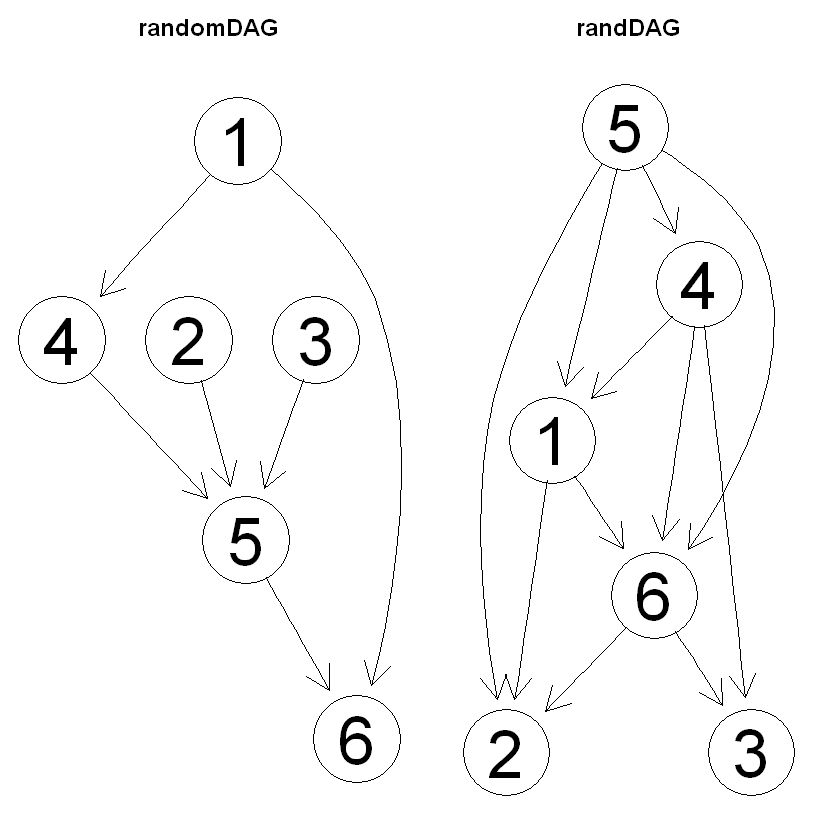

In [6]:
# creating a DAG
A <- rbind(c(0,1,0,0,1),
           c(0,0,0,1,1),
           c(1,0,0,1,0),
           c(1,0,0,0,1),
           c(0,0,0,0,0))

gA <- getGraph(A)
par(mfrow=c(1,2))
plot(gA,main="Graph from AM")

## Working with simulated data
# generating a random DAG
myDAG1 <- randomDAG(n = 6, prob= 0.5, lB = 0.1, uB = 1)
myDAG2 <- randDAG(6,3)
par(mfrow=c(1,2))
plot(myDAG1,main="randomDAG")
plot(myDAG2,main="randDAG")


In [7]:
# listing edges
myDAG1@edgeL
myDAG2@edgeL

# myDAG2 is not topologically ordering, then we can use 'tsort()'
tsort(myDAG2)

$`1`
$`1`$edges
[1] 6 4


$`2`
$`2`$edges
[1] 5


$`3`
$`3`$edges
[1] 5


$`4`
$`4`$edges
[1] 5


$`5`
$`5`$edges
[1] 6


$`6`
$`6`$edges
integer(0)

$`1`
$`1`$edges
2 6 
2 6 


$`2`
$`2`$edges
named integer(0)


$`3`
$`3`$edges
named integer(0)


$`4`
$`4`$edges
1 3 6 
1 3 6 


$`5`
$`5`$edges
1 2 4 6 
1 2 4 6 


$`6`
$`6`$edges
2 3 
2 3

[1] "5" "4" "1" "6" "3" "2"

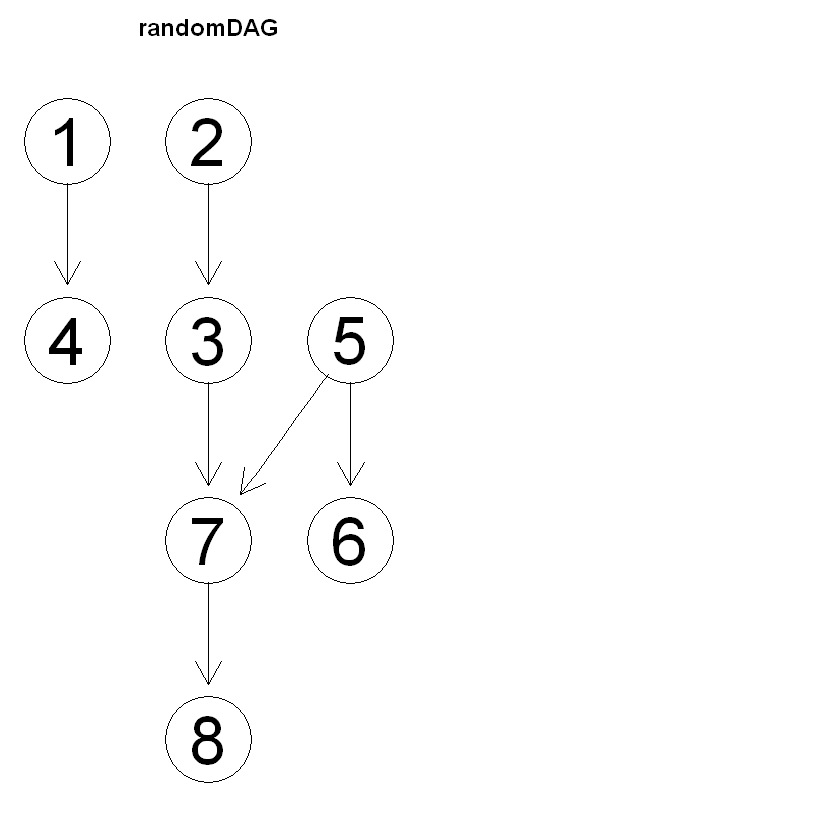

In [8]:
# For now, we will use a DAG generate via randomDAG (topol. ordered)
par(mfrow=c(1,2))

p <- 8
pconn <- 0.25
myDAG1 <- randomDAG(p, prob = pconn, lB=0.1, uB=1)

plot(myDAG1, main = "randomDAG")


### Estimate (Initial) Skeleton of a DAG

[1] "Author" "Bar"    "Ctrl"   "Goal"   "V5"     "V6"     "V7"     "V8"    
Order=0; remaining edges:56
x= 1  y= 2  S=  : pval = 9.117711e-86 
x= 1  y= 3  S=  : pval = 1.239262e-28 
x= 1  y= 4  S=  : pval = 0.474742 
x= 1  y= 5  S=  : pval = 0.002609827 
x= 1  y= 6  S=  : pval = 1.495292e-267 
x= 1  y= 7  S=  : pval = 6.325238e-39 
x= 1  y= 8  S=  : pval = 2.531073e-49 
x= 2  y= 1  S=  : pval = 9.117711e-86 
x= 2  y= 3  S=  : pval = 0 
x= 2  y= 4  S=  : pval = 0.7632856 
x= 2  y= 5  S=  : pval = 3.260209e-36 
x= 2  y= 6  S=  : pval = 5.03673e-20 
x= 2  y= 7  S=  : pval = 0.0001009499 
x= 2  y= 8  S=  : pval = 8.217523e-33 
x= 3  y= 1  S=  : pval = 1.239262e-28 
x= 3  y= 2  S=  : pval = 0 
x= 3  y= 4  S=  : pval = 0.9913656 
x= 3  y= 5  S=  : pval = 6.410519e-15 
x= 3  y= 6  S=  : pval = 1.800441e-05 
x= 3  y= 7  S=  : pval = 0.04240381 
x= 3  y= 8  S=  : pval = 4.258044e-15 
x= 4  y= 5  S=  : pval = 0.463391 
x= 4  y= 6  S=  : pval = 0.8826698 
x= 4  y= 7  S=  : pval = 0.2876146 
x= 4 

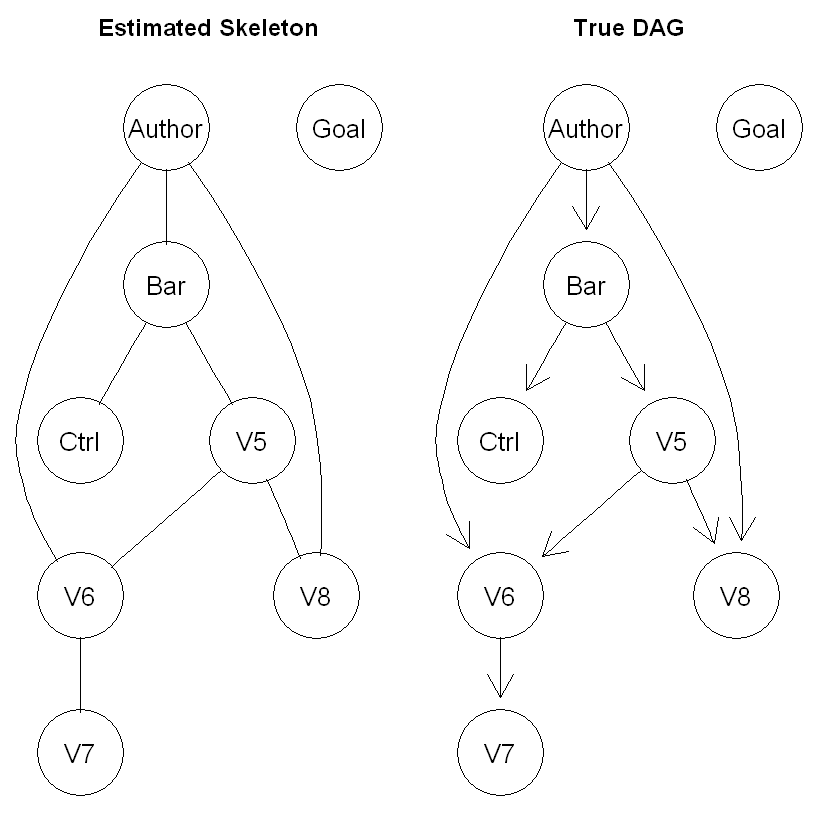

In [9]:
## Using Gaussian data
data(gmG)
n <- nrow (gmG8$x)
V <- colnames(gmG8$x) # labels aka node names
# estimate Skeleton
print(V)
skel.fit <- skeleton(suffStat = list(C = cor(gmG8$x), n = n),
                     indepTest = gaussCItest, ## (partial correlations)
                     alpha = 0.01, labels = V, verbose = TRUE)

# show estimated Skeleton
par(mfrow=c(1,2))
plot(skel.fit, main = "Estimated Skeleton")
plot(gmG8$g, main = "True DAG")


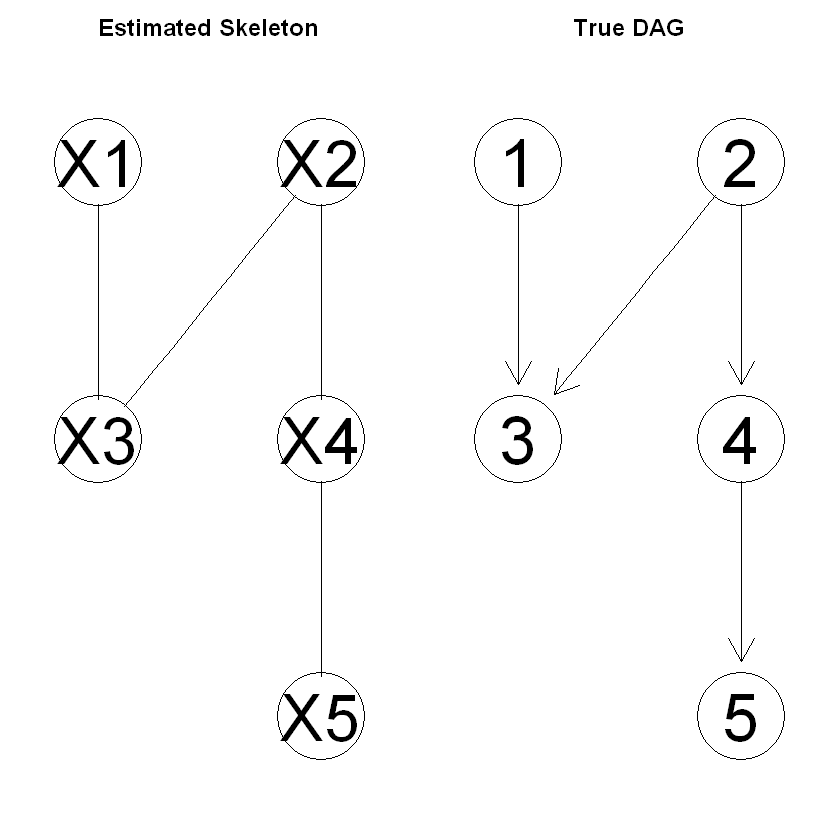

In [10]:
## Using discrete data
data(gmD)
V <- colnames(gmD$x) # labels aka node names
## define sufficient statistics
suffStat <- list(dm = gmD$x, nlev = c(3,2,3,4,2), adaptDF = FALSE)
## estimate Skeleton
skel.fit <- skeleton(suffStat,
                     indepTest = disCItest, ## (G^2 statistics independence test)
                     alpha = 0.01, labels = V, verbose = FALSE)
## show estimated Skeleton
par(mfrow = c(1,2))
plot(skel.fit, main = "Estimated Skeleton")
plot(gmD$g, main = "True DAG")


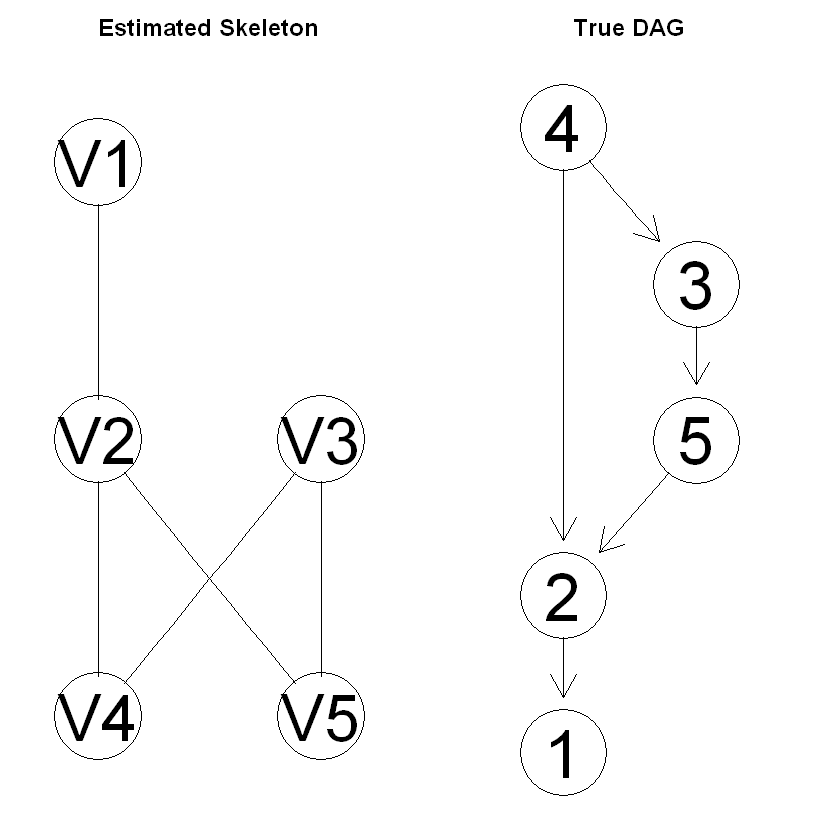

In [11]:
## Using binary data
data(gmB)
X <- gmB$x
## estimate Skeleton
skel.fm2 <- skeleton(suffStat = list(dm = X, adaptDF = FALSE),
                     indepTest = binCItest, alpha = 0.01,
                     labels = colnames(X), verbose = FALSE)

## show estimated Skeleton
par(mfrow = c(1,2))
plot(skel.fm2, main = "Estimated Skeleton")
plot(gmB$g, main = "True DAG")

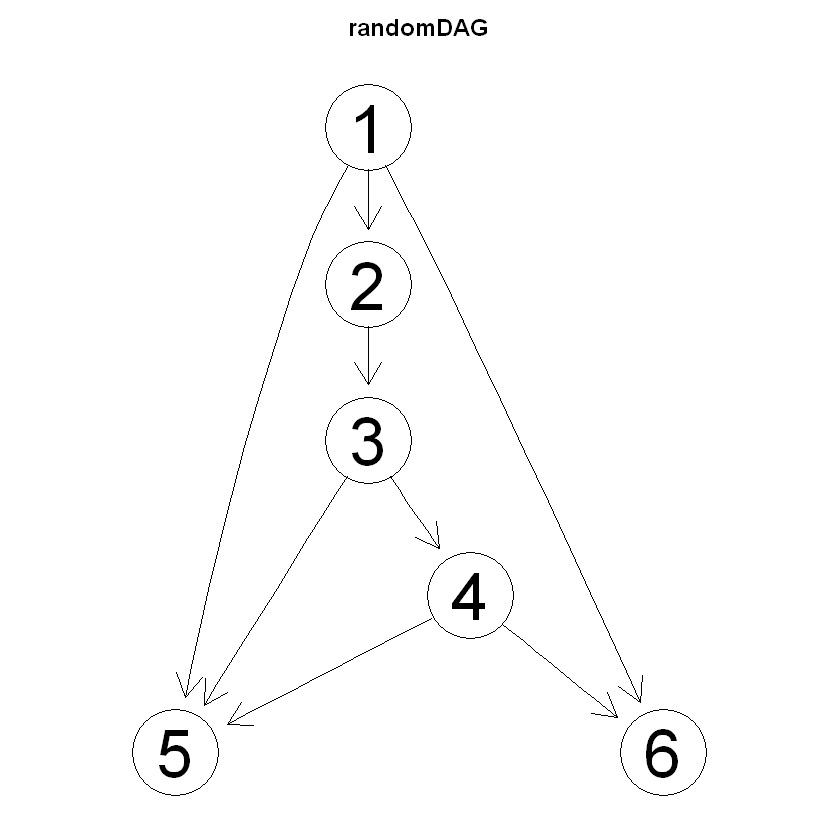

In [12]:
## Using simulated data
# Generating a DAG with node degrees >= 1
p <- 6
pconn <- 0.3
zerodegFlag <- TRUE

while (zerodegFlag ) {
  ## true DAG
  myDAG1 <- randomDAG(p, prob = pconn) 
  am <- (as(myDAG1,"matrix")!=0)*1L
  
  if (any(colSums(am + t(am)) == 0)) {
    zerodegFlag = TRUE
    next
  } else{
    zerodegFlag = FALSE
  }
}
plot(myDAG1, main = "randomDAG")

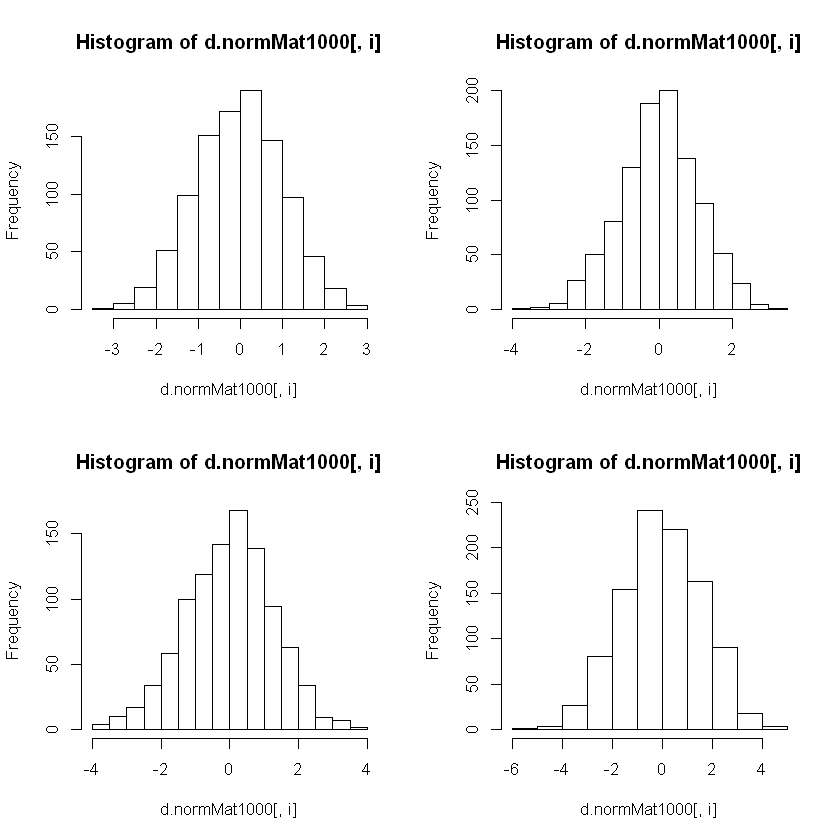

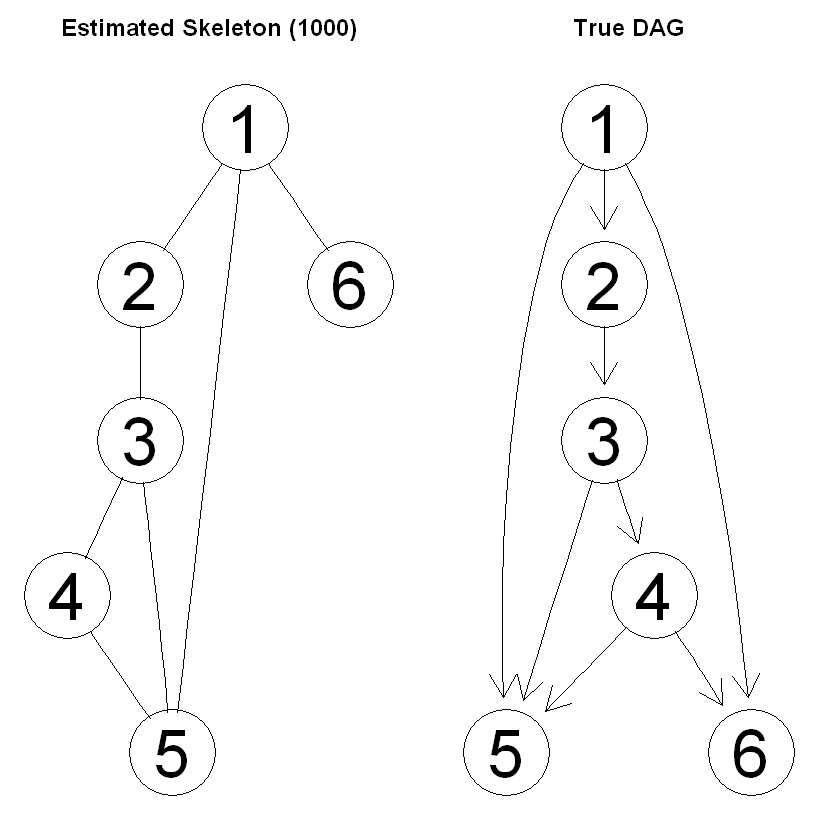

In [15]:
# Generating 1000 observations from myDAG1 using standard normal error distribution
d.normMat10000 <- rmvDAG(10000, myDAG1, errDist="normal")
d.normMat1000 <- rmvDAG(1000, myDAG1, errDist="normal")
d.normMat500 <- rmvDAG(500, myDAG1, errDist="normal")


# Visualizing the distribution of the first four variables
par(mfrow=c(2,2))
for (i in 1:4){
  hist(d.normMat1000[,i])  
}

n <- nrow (d.normMat1000)
V <- colnames(d.normMat1000) # labels aka node names

skel.fit <- skeleton(suffStat = list(C = cor(d.normMat1000), n = n),
                     indepTest = gaussCItest, ## (partial correlations)
                     alpha = 0.01, labels = V, verbose = FALSE)
# show estimated Skeleton
par(mfrow=c(1,2))
plot(skel.fit, main = "Estimated Skeleton (1000)")
plot(myDAG1, main = "True DAG")

### PC Algorithm

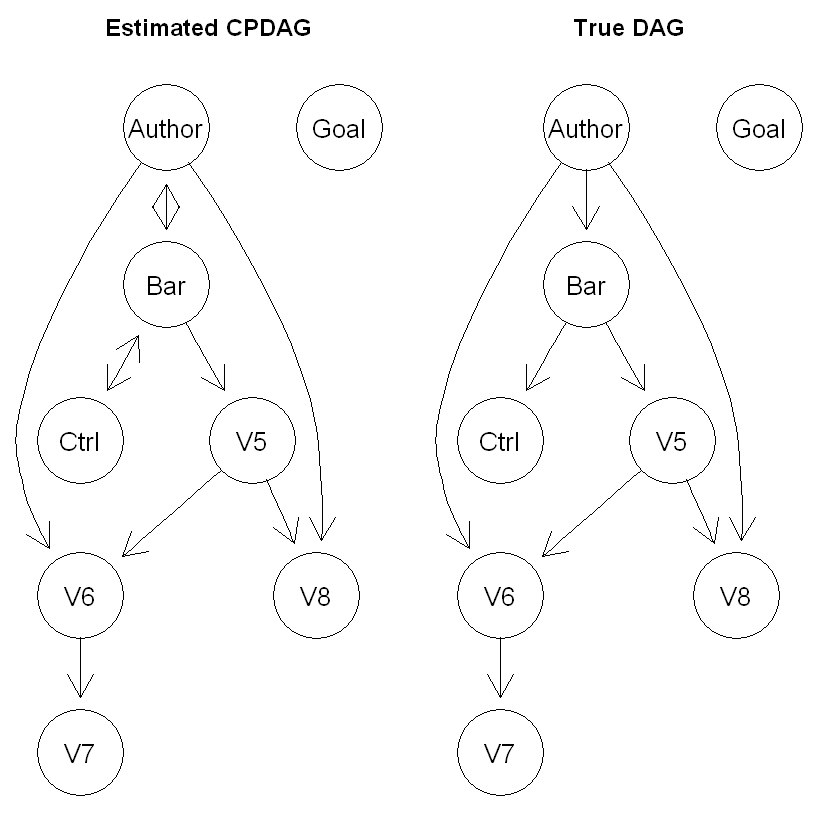

In [16]:
## PC
## Using Gaussian Data
n <- nrow (gmG8$ x)
V <- colnames(gmG8$ x) 
## estimate CPDAG
pc.fit <- pc(suffStat = list(C = cor(gmG8$x), n = n),
             indepTest = gaussCItest, 
             alpha=0.01, labels = V, verbose = FALSE)

## show estimated CPDAG
par(mfrow=c(1,2))
plot(pc.fit, main = "Estimated CPDAG")
plot(gmG8$g, main = "True DAG")



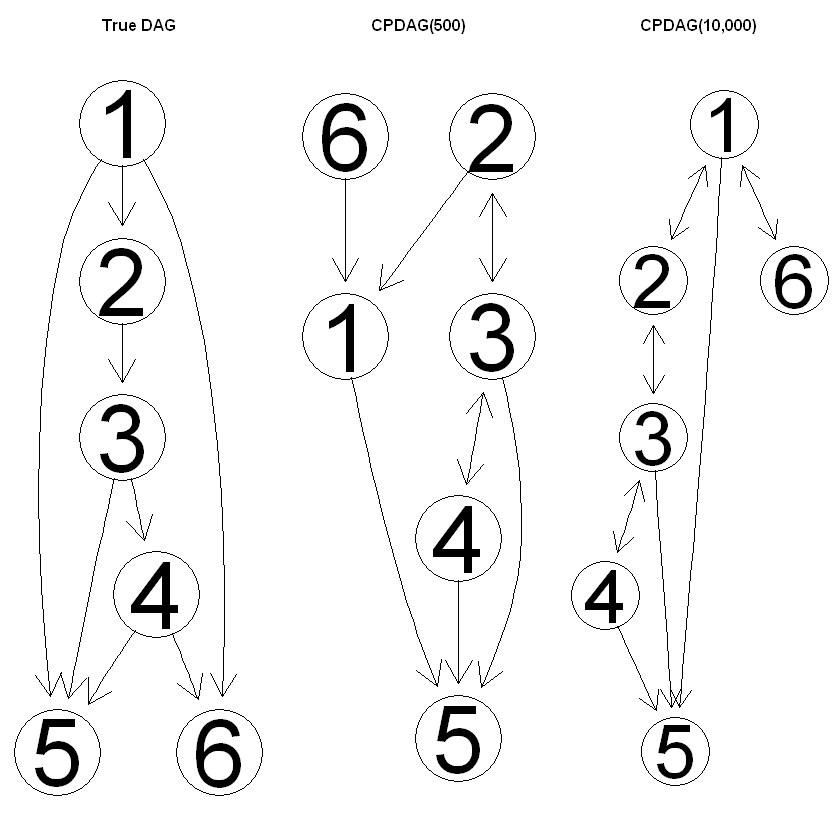

In [17]:
## Using simulated data
n <- nrow (d.normMat500)
V <- colnames(d.normMat500) 

pc.fit500 <- pc(suffStat = list(C = cor(d.normMat500), n = n),
             indepTest = gaussCItest, 
             alpha=0.01, labels = V, verbose = FALSE)

n <- nrow (d.normMat10000)
V <- colnames(d.normMat1000) 

pc.fit10000 <- pc(suffStat = list(C = cor(d.normMat10000), n = n),
             indepTest = gaussCItest, 
             alpha=0.01, labels = V, verbose = FALSE)

# show estimated CPDAG
par(mfrow=c(1,3))
plot(myDAG1, main = "True DAG")
plot(pc.fit500, main = "CPDAG(500)")
plot(pc.fit10000, main = "CPDAG(10,000)")


### FCI and RFCI

2,3,4,5
0.9237010,0.8026594,1.2472795,2.11465112
-0.1891547,0.3614572,0.7578452,0.02326681
1.0161807,-2.0365093,0.1309613,-0.98425802
0.3634292,0.5638042,-0.2141021,-0.17479470
0.4972855,1.8624752,0.8092486,0.47645959
-0.1997169,-0.2022446,-2.3221137,-1.43054262


A graphNEL graph with directed edges
Number of Nodes = 5 
Number of Edges = 5 

No need to specify 'p', when 'labels' is given


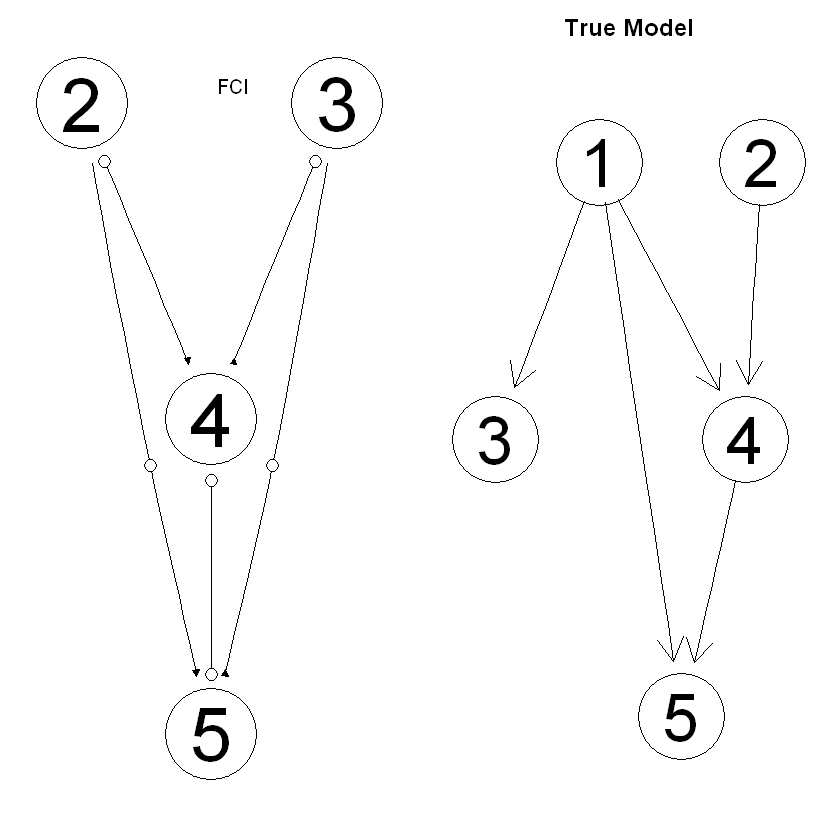

In [20]:
## FCI
data("gmL")

# visualizing the first 6 rows in the data set
# dimension of the data set (rows=observations, cols=Variables)
head(gmL$x)

# Number of nodes and edges in the true Model
gmL$g

suffStat1 <- list(C = cor(gmL$x), n = nrow(gmL$x))
pagfci.est <- fci(suffStat1, indepTest = gaussCItest, 
               p = ncol(gmL$x), alpha = 0.01, 
               labels = as.character(2:5))

par(mfrow = c(1, 2))
plot(pagfci.est)
mtext("FCI",side=3)
plot(gmL$g, main = "True Model")


No need to specify 'p', when 'labels' is given


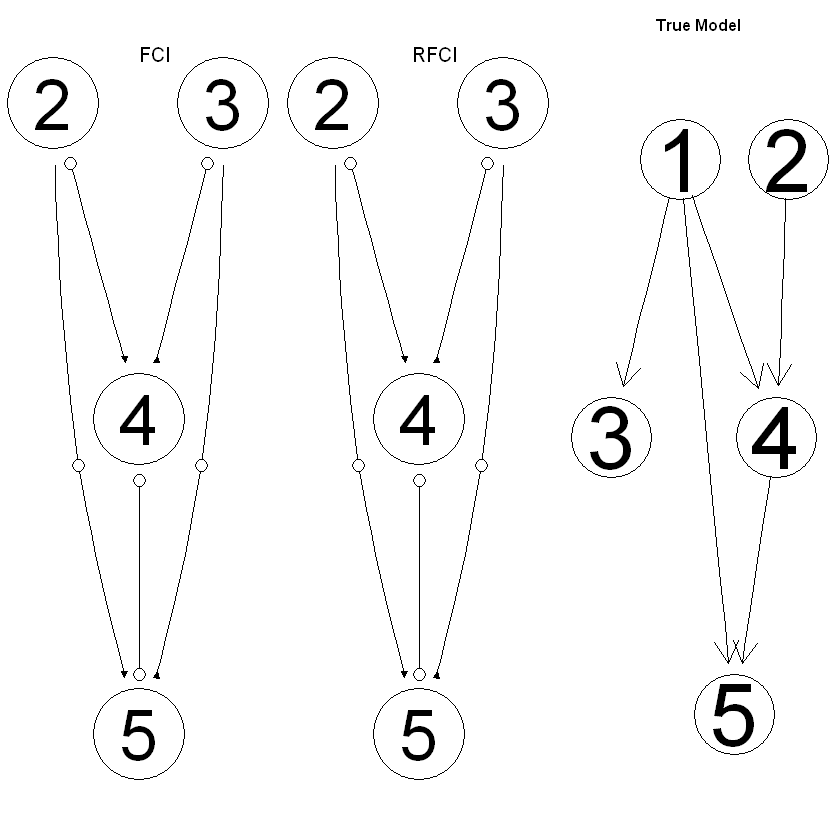

In [23]:
## RFCI
# same data set gML

suffStat1 <- list(C = cor(gmL$x), n = nrow(gmL$x))

pagrfci.est <- rfci(suffStat1, indepTest = gaussCItest, 
                p = ncol(gmL$x),alpha = 0.01, 
                labels = as.character(2:5))

par(mfrow = c(1, 3))
plot(pagfci.est)
mtext("FCI",side=3)
plot(pagrfci.est)
mtext('RFCI',side=3)
plot(gmL$g, main = "True Model")


### Comparing graphs via Structural Hamming Distance

[1] 0
[1] 1
[1] 2


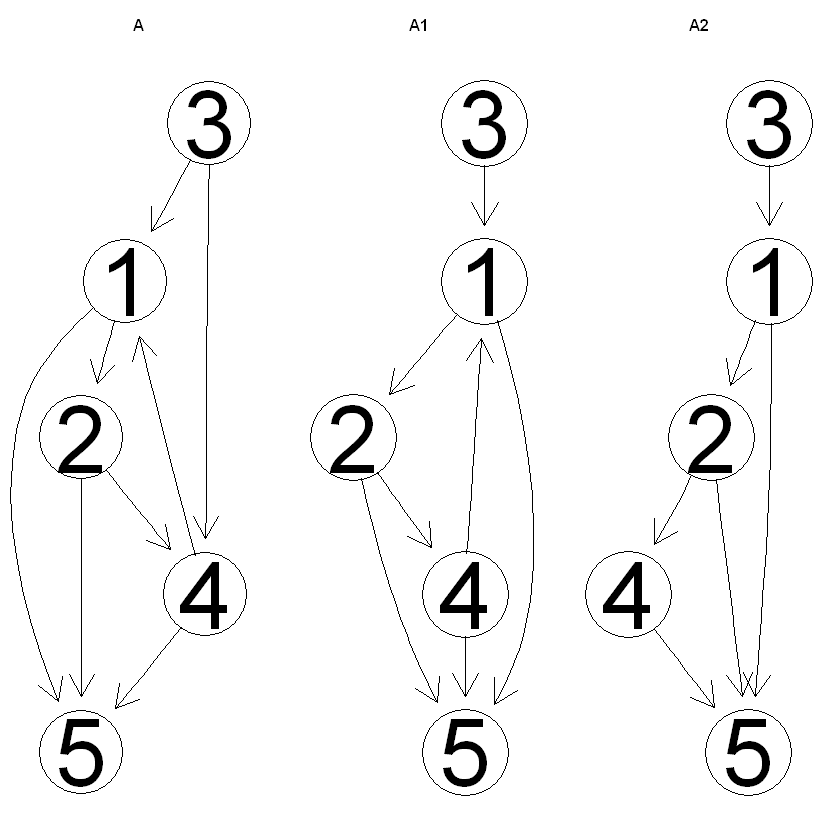

In [24]:
## Creating a graph from an adjacency matrix
Am <- rbind(c(0,1,0,0,1),
           c(0,0,0,1,1),
           c(1,0,0,1,0),
           c(1,0,0,0,1),
           c(0,0,0,0,0))

# shd() function needs the graphs as a graphNEL object
A <- as(getGraph(Am),"graphNEL")

# We remove the 3 -> 4 link in A and create the graph A1
A1 <- removeEdge(from="3",to="4",A)

# We remove the 4 -> 1 link in A1 and create the graph A2
A2 <- removeEdge(from="4",to="1",A1)


par(mfrow =c(1,3))
plot(A, main="A")
plot(A1, main="A1")
plot(A2, main="A2")

# computing and printing the distance values
shdAA <- shd(A,A)
shdAA1 <- shd(A,A1)
shdAA2 <- shd(A,A2)

print(shdAA)
print(shdAA1)
print(shdAA2)

### causal effects computation ida

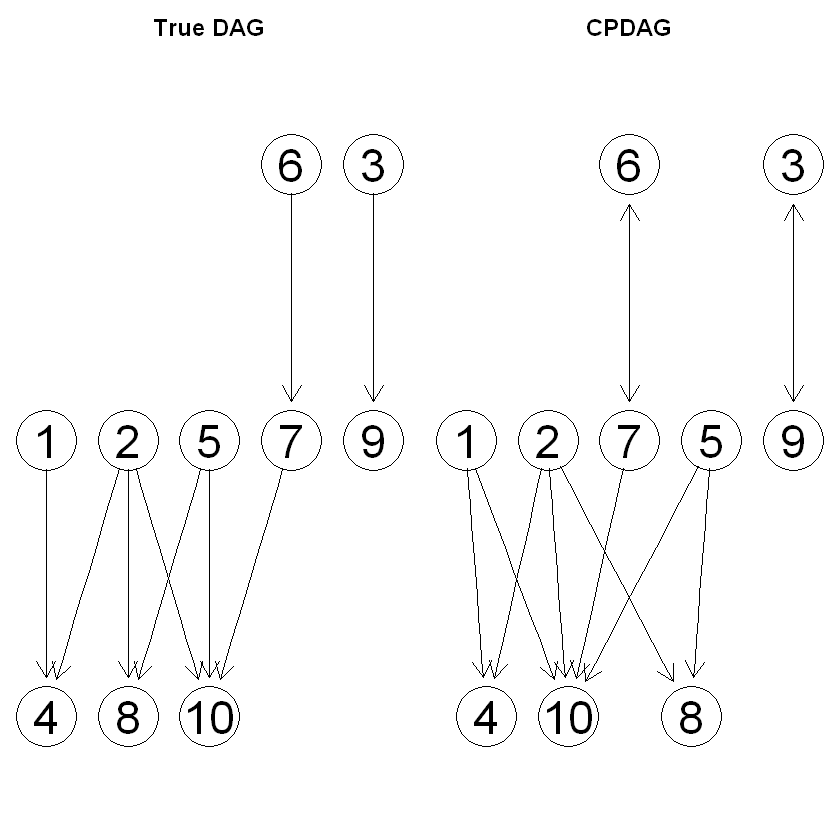

[1] 0.01078341 0.56612012 0.01078341 0.56612012
[1] 0.56612012 0.01078341
[1] 0.5866184


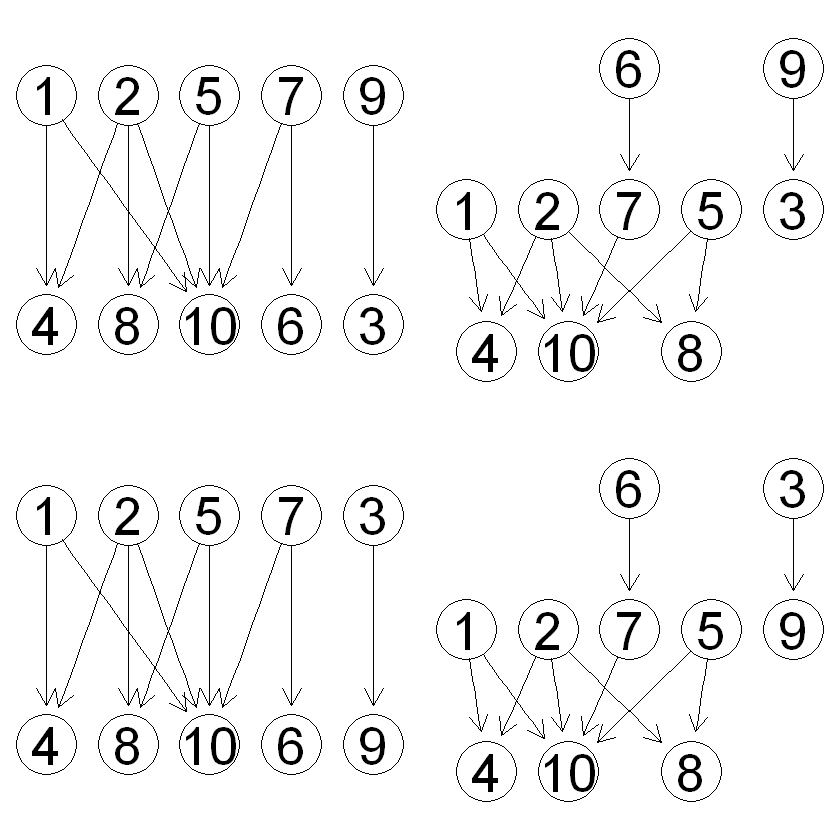

In [26]:
# causal effects computation ida
set.seed(123)
p <- 10
myDAG <- randomDAG(p, prob = 0.2) ## true DAG
## simulate Gaussian data from the true DAG
n <- 10000
dat <- rmvDAG(n, myDAG)
## estimate CPDAG and PDAG -- see help(pc)
suffStat <- list(C = cor(dat), n = n)
pc.fit <- pc(suffStat, indepTest = gaussCItest, p=p, alpha = 0.01)

par(mfrow=c(1,2))
plot(myDAG, main="True DAG")
plot(pc.fit, main="CPDAG")

# unfolding the CPDAG
amat <- as(pc.fit,"amat")
all.dags <- pdag2allDags(amat)

# for convenience a simple plotting function
# for the function output
plotAllDags <- function(res) {
  require(graph)
  p <- sqrt(ncol(res$dags))
  nDags <- ceiling(sqrt(nrow(res$dags)))
  par(mfrow = c(nDags, nDags))
  for (i in 1:nrow(res$dags)) {
    tmp <- matrix(res$dags[i,],p,p)
    colnames(tmp) <- rownames(tmp) <- res$nodeNms
    plot(as(tmp, "graphNEL"))
  }
}

plotAllDags(all.dags)

# computing the causal effects 
#ida(X, Y, mcov, CPDAG, method = c("local","global"))
print(ida(6,10, cov(dat), pc.fit@graph, method = "global", type = "cpdag"))
print(ida(6,10, cov(dat), pc.fit@graph, method = "local", type = "cpdag"))

#True causal effect
# causalEffect(DAG, Y , X)
print(causalEffect(myDAG, 10, 6))


In [ ]:
sessionInfo()